In [1]:
source("../R4_Batch_effect_Normalization/mass_cytometry_functions.R")

In [2]:
options(
repr.plot.width=15,
repr.plot.height=7

)

In [3]:
needed_antibody1<- c('CD196','CD19', 'CD5',  'CD38', 'IgD', 'CD11c', 'CD43', 'CD69',
                    'CD21', 'CXCR5', 'CD62L', 'CD27', 'CD22', 'CXCR3', 'CD23', 'CD24', 'CCR7', 
                    'CD20', 'IgM', 'HLA-DR', 'CD49d', 'CXCR4')
needed_antibody2<- c('CD19', 'CD5',  'CD38',  'CD69',
                    'CD21', 'CXCR5', 'CD62L', 'CD27', 'IgM')

#####Use the functions

In [5]:
number_of_cell = 2000
concat_result <- generate_concat(c("_1_", "_2_", "_3_", "_5_","_6_"), 
                "../R4_Batch_effect_Normalization/Data/all_cytonorm_normalized/",
                number_of_cell,
                column_needed = needed_antibody1,
                "yes",
                "concattransformed2"
               )

In [6]:
pqr<- cluster_proportion_from_concat(
    "concattransformed.fcs",
    FALSE,
    concat_result$cell_lengths,
    20,
    concat_result$columns_length,
    concat_result$file_names
)

In [67]:
write.csv(pqr$proportion, "clusters_proportions.csv")

In [7]:
filenames<- rep(concat_result$file_names, each = number_of_cell) 
orignal_index<- concat_result$original_indexes
cluster_number<- GetMetaclusters(pqr$fsom)[1:length(orignal_index)]

In [8]:
clusters_result<- data.frame(filenames, orignal_index, cluster_number)

In [9]:
write.csv(clusters_result, "cluster_index_filename.csv")

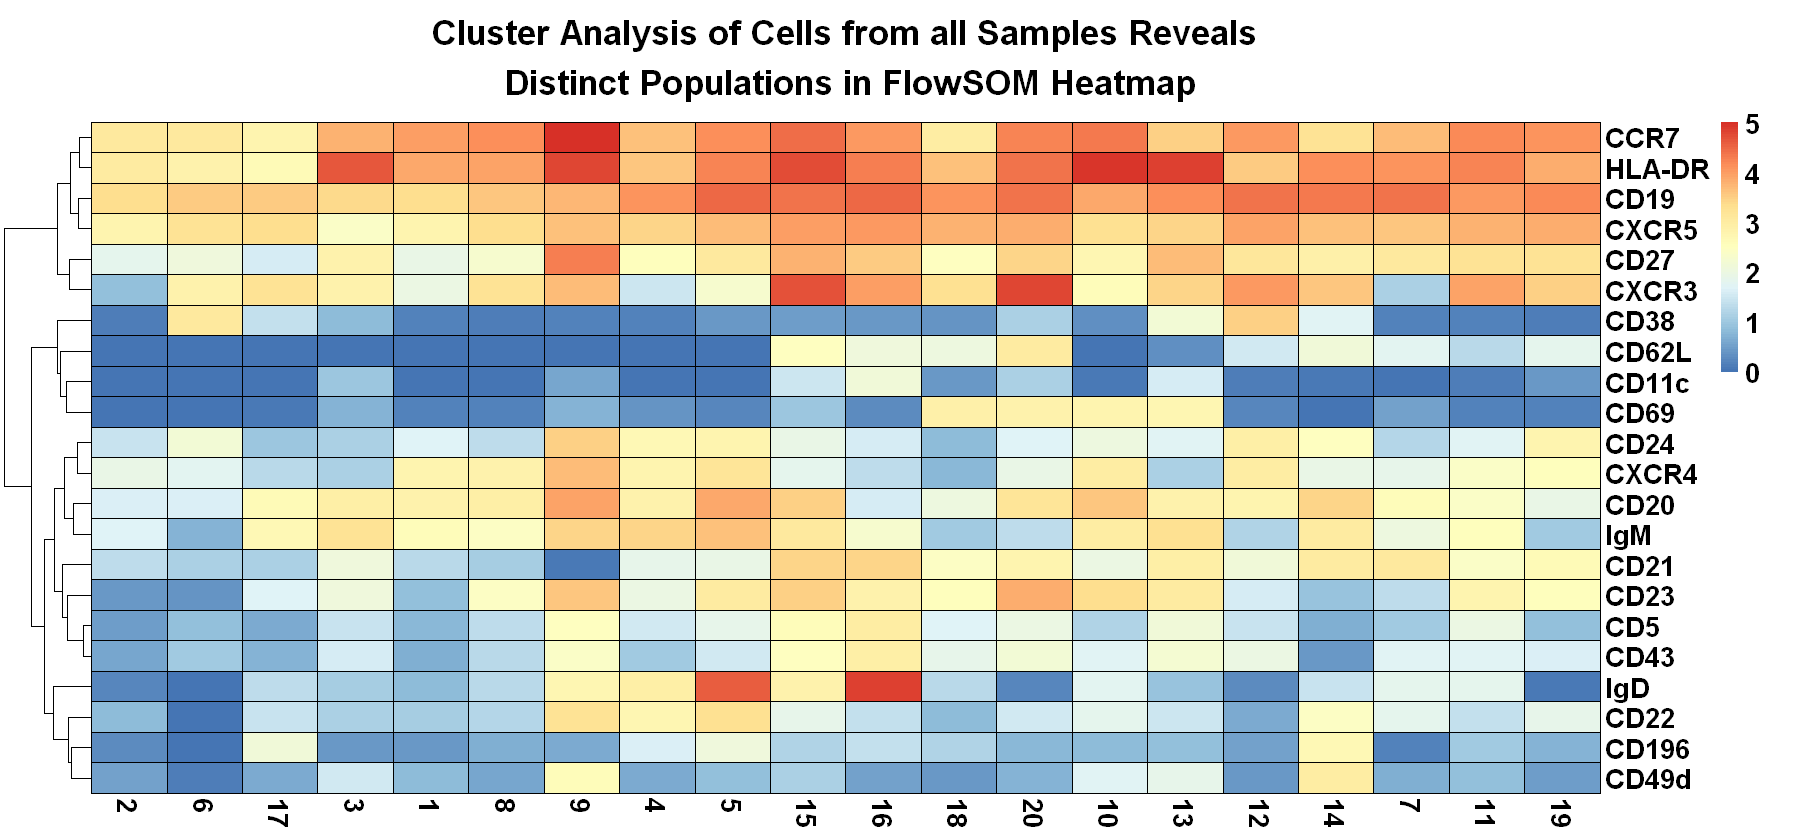

In [10]:
results<- FlowSOM::MetaclusterMFIs(fsom = pqr$fsom)
plot3<- pheatmap::pheatmap(t(results),  
                           border_color = "black", 
                           #scale="row",
                           fontsize=16, 
                           fontface= "bold",
                           
                   #annotation_row = rownames(average),
                   #treeheight_row = 0,
                   treeheight_col = 0,
                   #cutree_rows = 2,
                    #show_colnames = F,
                    #show_rownames = F,
                   #kmeans_k= 4,
                    #color = c("blue", "yellow","red"),
                    #breaks = c(-4, -0.5, 1, 4), 
                    main = "Cluster Analysis of Cells from all Samples Reveals\n Distinct Populations in FlowSOM Heatmap"
                  )

<h1>UMAP TO SHOW ALL THE CLUSTERS IN 2D</h1>

In [57]:
BB1<- read.FCS("concattransformed.fcs")
BB1<- exprs(BB1)
rownames(BB1)<- c(1: dim(BB1)[1])

In [58]:
number_of_umap_cell <- 10000
BB1<- BB1[sample(nrow(BB1), number_of_umap_cell), ]

In [59]:
yyy<- pqr$fsom[[2]]
attributes(yyy)<- NULL
for (i in c(1:20))
    {assign(paste("yyy", i, sep=""), which(i == yyy))}

In [60]:
tobeindexed<- pqr$fsom[[1]]$map$mapping
rownames(tobeindexed)<- c(1:dim(tobeindexed)[1])
acc<- c()
for (i in rownames(BB1))
    {new<- tobeindexed[i, 1]
    new<- new[[1]]
    acc<- append(acc, new)}

In [61]:
table(pqr$fsom[[2]])
as.vector(table(pqr$fsom[[2]]))
bak<- rep(c(1:20), times=as.vector(table(pqr$fsom[[2]])))

bak1<- c(yyy1, yyy2, yyy3, yyy4, yyy5, yyy6, yyy7, yyy8, yyy9, yyy10, yyy11, yyy12, yyy13, yyy14, yyy15, yyy16, yyy17, yyy18, yyy19, yyy20)

df2<- data.frame(bak1)
df2$bak<- bak 
new5<- c()
for (i in acc)
    {pp<-df2[which(df2$bak1==i), 2]
    new5<- append(new5, pp)}
kj<- new5
Labels<-kj
kj<-as.factor(kj)
## for plotting
colors = randomcoloR::distinctColorPalette(length(unique(kj)))
#names(colors) = unique(kj)


 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
23 10  6  7  3  1  1  9  2  5  9  2  3  8  3  1  1  1  2  3 

[1] 23 10  6  7  3  1  1  9  2  5  9  2  3  8  3  1  1  1  2  3

In [62]:
set.seed(45)
gg<- umap::umap(BB1, n_neighbours= 200, min_dist= 0.25)

In [63]:
options(
repr.plot.width=12,
repr.plot.height=7

)

In [64]:
df1<- gg$layout
colnames(df1)<- c("umap1", "umap2")
clusters<- kj
df1<- cbind(df1, clusters)
first<- aggregate(umap1 ~ clusters, data = df1, mean)
second<- aggregate(umap2 ~ clusters, data = df1, mean)
coordinate<- cbind(first, second$umap2)
colnames(coordinate)<- c("clusters", "umap1", "umap2")

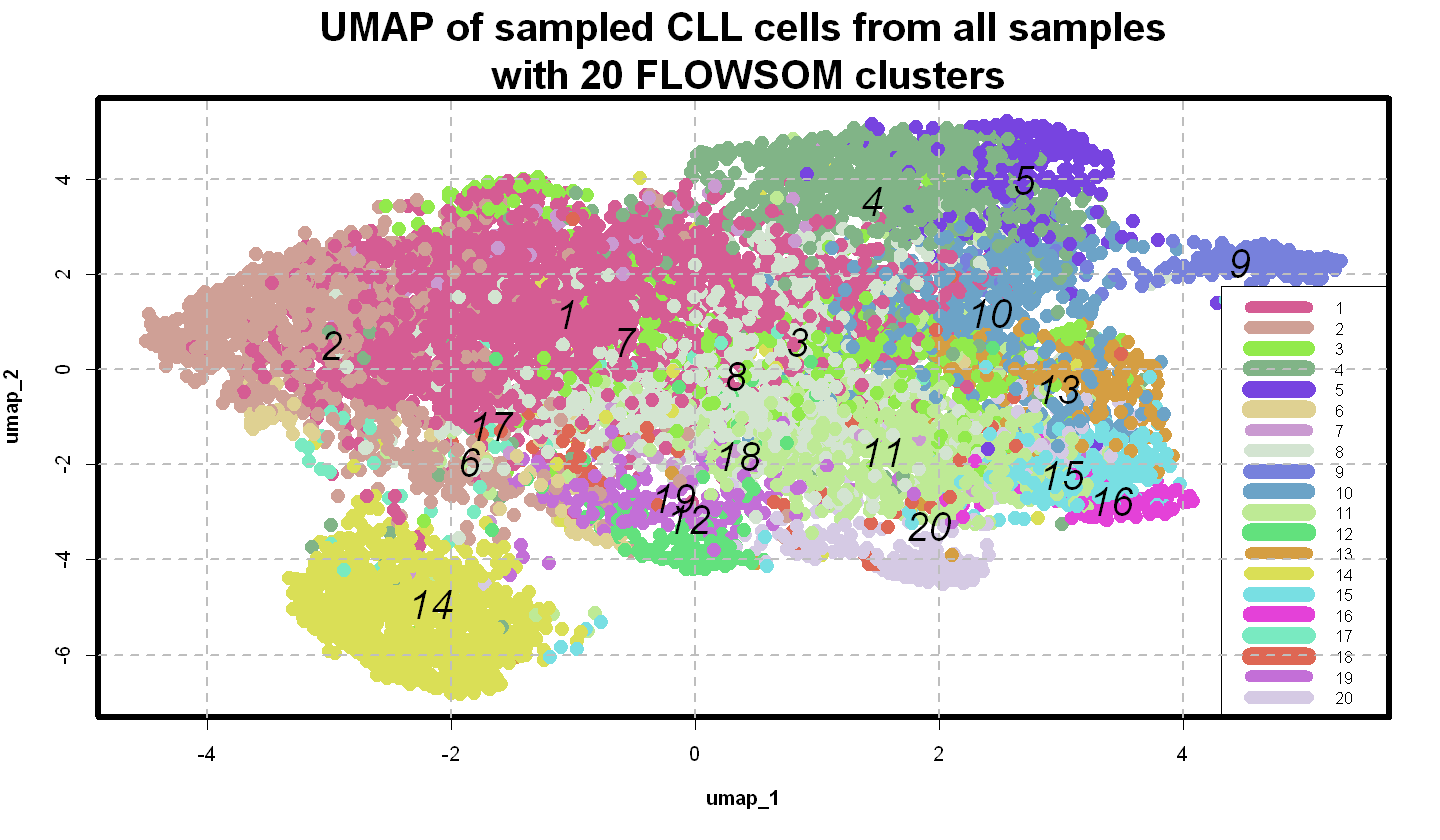

In [65]:
plot(gg$layout, main= "UMAP of sampled CLL cells from all samples\n with 20 FLOWSOM clusters",
     xlab=substitute(paste(bold('umap_1'))), 
     ylab=substitute(paste(bold('umap_2'))),
     col=colors[kj], 
     pch=19,
    cex= 1.5,
    cex.main=2.0
   ) 

legend("bottomright", legend= c(1:20), col=colors, lwd=10:15, cex=0.8)
box(lwd= 5)
grid(nx = NULL, ny = NULL,
     lty = 2,      # Grid line type
     col = "gray", # Grid line color
     lwd = 2) 
for (i in c(1:dim(coordinate)[1])){
   text(x=coordinate[i, 2], y=coordinate[i, 3], coordinate[i, 1], cex=2, font=3)}